In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

## 转换背景图

In [2]:
def read_img(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (400, 300))
    return img

def generate_C_array(img, threshold = 1, outputfile=False):
    flat = (img.flatten() > threshold)  # 转成1/0形式
    strs = "const char IMG0[] = {\n"
    for i in range(1500):
        strs += "    "
        for j in range(10):
            pxs = flat[i * 80 + j * 8: i * 80 + j * 8 + 8]
            value = 0
            for b in range(8):
                value += (not pxs[7-b]) << b
            strs += "%#.2x, " % (value)
        strs += "\n"
    strs += "};"
    
    strs = strs[:-5] + strs[-4:]  # 去掉最后一个逗号
        
    if outputfile:
        with open('./模拟灰度的C数组代码.txt', 'w') as f:
            f.write(strs)
    return strs

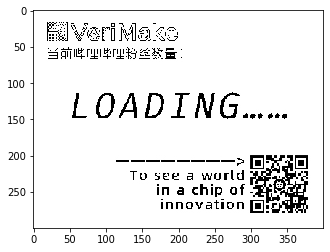

const char IMG0[] = {
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
   

In [3]:
img1 = read_img("background.jpg")

plt.imshow(cv2.cvtColor(img1, cv2.COLOR_GRAY2RGB))
plt.show()

a = generate_C_array(img1, threshold = 205, outputfile=False)
print(a)

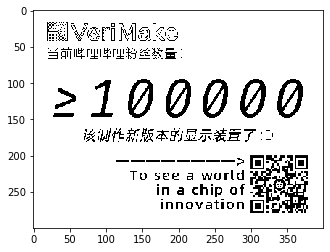

const char IMG0[] = {
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
   

In [4]:
img2 = read_img("over100k.jpg")

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB))
plt.show()

a = generate_C_array(img2, threshold = 205, outputfile=False)
print(a)

## 转换数字的图

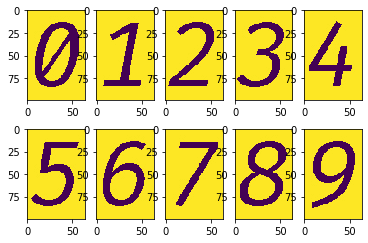

In [5]:
digits = cv2.imread("font.jpg", cv2.IMREAD_GRAYSCALE)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits[:, i*64: i*64+64])


In [6]:
strs = "const char digits[] = {\n"

for i in range(10):
    digit = digits[:, i*64: i*64+64]
    flat = (digit.flatten() > 100)  # 转成1/0形式
    
    strs += '    /* 大数字 %d  (64*100) */\n' % (i)
    
    for i in range(100):
        strs += "    "
        
        for j in range(8):
            pxs = flat[i * 64 + j * 8: i * 64 + j * 8 + 8]
            value = 0
            for b in range(8):
                value += (not pxs[7-b]) << b
            strs += "%#.2x, " % (value)
        strs += "\n"
    
strs = strs[:-3] + "\n};"

print(strs)

const char digits[] = {
    /* 大数字 0  (64*100) */
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x00, 0x3f, 0xf0, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x01, 0xff, 0xfe, 0x00, 0x00, 
    0x00, 0x00, 0x00, 0x07, 0xff, 0xff, 0x80, 0x00, 
    0x00, 0x00, 0x00, 0x1f, 0xff, 0xff, 0xe0, 0x0